In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2022/train.csv
/kaggle/input/tabular-playground-series-mar-2022/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_import = pd.read_csv("../input/tabular-playground-series-mar-2022/train.csv")
test_import = pd.read_csv("../input/tabular-playground-series-mar-2022/test.csv")

In [4]:
df = train_import.copy()

34    26498
40    19797
47    19418
29    19236
48    19013
      ...  
95      140
97      104
98       87
1        48
99       42
Name: congestion, Length: 101, dtype: int64

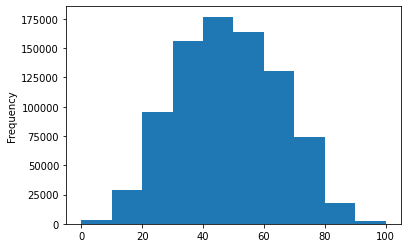

In [5]:
df["congestion"].plot(kind = "hist")
df["congestion"].value_counts()

In [6]:
df["time"] = pd.to_datetime(df["time"])
df = df.set_index("time", drop = True)
df = df.drop("row_id", axis = 1)
df.tail()

,x,y,direction,congestion
time,,,,
1991-09-30 11:40:00,2,3,NB,54
1991-09-30 11:40:00,2,3,NE,28
1991-09-30 11:40:00,2,3,SB,68
1991-09-30 11:40:00,2,3,SW,17
1991-09-30 11:40:00,2,3,WB,24


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 848835 entries, 1991-04-01 00:00:00 to 1991-09-30 11:40:00
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   x           848835 non-null  int64 
 1   y           848835 non-null  int64 
 2   direction   848835 non-null  object
 3   congestion  848835 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 32.4+ MB


In [8]:
df.direction.value_counts()

EB    156708
NB    156708
SB    156708
WB    143649
NE     91413
SW     91413
NW     26118
SE     26118
Name: direction, dtype: int64